# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Angela Gabrielle Tungky]
- **Email:** [angelagtungky@gmail.com]
- **ID Dicoding:** [angelagtungky]

## Menentukan Pertanyaan Bisnis

- How do weather conditions influence bike rental patterns?
- How does the bike rental demand vary across different seasons?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Mendeteksi Missing value

In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Mendeteksi duplicate data

In [8]:
day_df.duplicated().sum()

0

In [9]:
hour_df.duplicated().sum()

0

Dari kode di atas, maka dapat disumpulkan bahwa data day_df dan hour_df tidak memiliki duplicated value.

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

##### Karena data sudah tidak memiliki missing value, duplicate data, dan inaccurate value, maka data digolongkan sudah clean

In [12]:
#Mengganti nama keterangan season untuk mempermudah data readability

In [13]:
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [14]:
#Mengganti nama keterangan weekday untuk mempermudah data readability

In [15]:
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [16]:
day_df['season'] = day_df.season.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')

In [17]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    int64   
 4   mnth        731 non-null    int64   
 5   holiday     731 non-null    int64   
 6   weekday     731 non-null    category
 7   workingday  731 non-null    int64   
 8   weathersit  731 non-null    int64   
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(2), float64(4), int64(9), object(1)
memory usage: 82.1+ KB


In [19]:
#Mengganti nama keterangan season untuk mempermudah data readability

In [20]:
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

In [21]:
#Mengganti nama keterangan weekday untuk mempermudah data readability

In [22]:
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [23]:
hour_df['season'] = hour_df.season.astype('category')

In [24]:
hour_df['weekday'] = hour_df.weekday.astype('category')

In [25]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,Sat,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,Sat,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,Sat,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,Sat,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,Sat,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  int64   
 4   mnth        17379 non-null  int64   
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  int64   
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  int64   
 9   weathersit  17379 non-null  int64   
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(2), float64(4), int64(10), object(1)
memory usage: 2.0+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,NaN,NaN,NaN,NaN,Sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,0.502561,6.537775,11.546752,0.028770,NaN,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,0.167165,NaN,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,0.000000,4.000000,6.000000,0.000000,NaN,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,1.000000,7.000000,12.000000,0.000000,NaN,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,1.000000,10.000000,18.000000,0.000000,NaN,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [28]:
hour_df.groupby(by="weathersit").agg({
    "cnt": ["count", "sum", "mean", "median"],
    "temp": ["mean", "std"],
    "hum": ["mean", "std"],
    "windspeed": ["mean", "std"]
})

cnt                                  temp                 hum  \
            count      sum        mean median      mean       std      mean   
weathersit                                                                    
1           11413  2338173  204.869272  159.0  0.511054  0.200775  0.573747   
2            4544   795952  175.165493  133.0  0.474445  0.175933  0.698807   
3            1419   158331  111.579281   63.0  0.456688  0.160509  0.827632   
4               3      223   74.333333   36.0  0.186667  0.041633  0.883333   

                     windspeed            
                 std      mean       std  
weathersit                                
1           0.178463  0.190553  0.123788  
2           0.172478  0.179973  0.114463  
3           0.157370  0.218825  0.130198  
4           0.040415  0.204000  0.119714

Berdasarkan tabel di atas, dapat diketahui bahwa para pengendara sepeda paling banyak menyewa sepeda pada weathersit 1, yaitu pada cuaca yang Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian

In [29]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Fall,NaN,NaN,NaN,Mon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,6.519836,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,0.167155,NaN,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,4.000000,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,1.000000,7.000000,0.000000,NaN,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,1.000000,10.000000,0.000000,NaN,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [30]:
# Group by season and aggregate statistics for bike rental counts
day_df.groupby(by="season").agg({
    "cnt": ["count", "sum", "mean", "median"]
})

cnt                              
       count      sum         mean  median
season                                    
Fall     188  1061129  5644.303191  5353.5
Spring   181   471348  2604.132597  2209.0
Summer   184   918589  4992.331522  4941.5
Winter   178   841613  4728.162921  4634.5

Berdasarkan tabel di atas, dapat diketahui bahwa para pengendara sepeda paling banyak menyewa sepeda pada musim gugur (fall)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

How do weather conditions influence bike rental patterns?

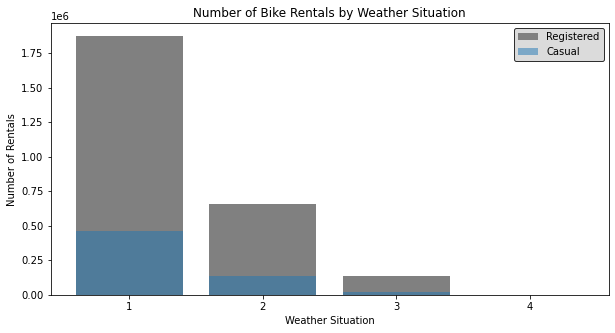

In [31]:
import matplotlib.pyplot as plt

# Group by weather situation and sum casual and registered users
weather_grouped = hour_df.groupby('weathersit')[['casual', 'registered']].sum()

# Determine the dominant weather situation
dominant_weather = weather_grouped['registered'].idxmax()

# Get the unique weather situations and their counts
weather_situations = weather_grouped.index
counts = weather_grouped.sum(axis=1)

# Plot the bar chart
plt.figure(figsize=(10, 5))

# Plot registered users
plt.bar([str(ws) for ws in weather_situations], weather_grouped['registered'], color='tab:blue' if dominant_weather == 'registered' else 'grey', label='Registered')

# Plot casual users
plt.bar([str(ws) for ws in weather_situations], weather_grouped['casual'], color='grey' if dominant_weather == 'casual' else 'tab:blue', alpha=0.5, label='Casual')

plt.title("Number of Bike Rentals by Weather Situation")
plt.ylabel("Number of Rentals")
plt.xlabel("Weather Situation")

# Modify legend colors
plt.legend(facecolor='lightgrey', edgecolor='black')

plt.show()


### Pertanyaan 2:

How does the bike rental demand vary across different seasons?

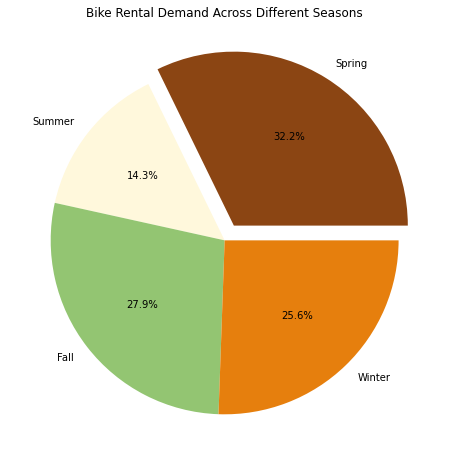

In [32]:
import matplotlib.pyplot as plt

# Get counts of bike rentals for each season
season_counts = day_df.groupby('season')['cnt'].sum()

# Define labels for seasons
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']

# Define colors for each season
colors = ['#8B4513', '#FFF8DC', '#93C572', '#E67F0D']

# Explode the slice for the largest season (optional)
explode = (0.1, 0, 0, 0)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    x=season_counts,
    labels=season_labels,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.title("Bike Rental Demand Across Different Seasons")
plt.show()


## Conclusion

- Penyewaan sepeda paling banyak dilakukan dalam kondisi weathersit 1, yaitu pada cuaca yang cerah, sedikit berawan, berawan sebagian, berawan sebagian
- Penyewaan sepeda bervariasi di setiap musim, dengan penyewaan paling dominan dilakukan pada musim semi

In [36]:
# Ensure 'dteday' column is in datetime format
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

rfm_df = hour_df.groupby(by="hr", as_index=False).agg({
    "dteday": "max",  # mengambil tanggal penyewaan sepeda terakhir
    "instant": "nunique",  # menghitung jumlah penyewaan sepeda
    "cnt": "sum"  # menghitung jumlah revenue yang dihasilkan
})

rfm_df.columns = ["hr", "last_order_date", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["last_order_date"] = rfm_df["last_order_date"].dt.date
recent_date = hour_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["last_order_date"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("last_order_date", axis=1, inplace=True)
rfm_df.head(5)


,hr,frequency,monetary,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0


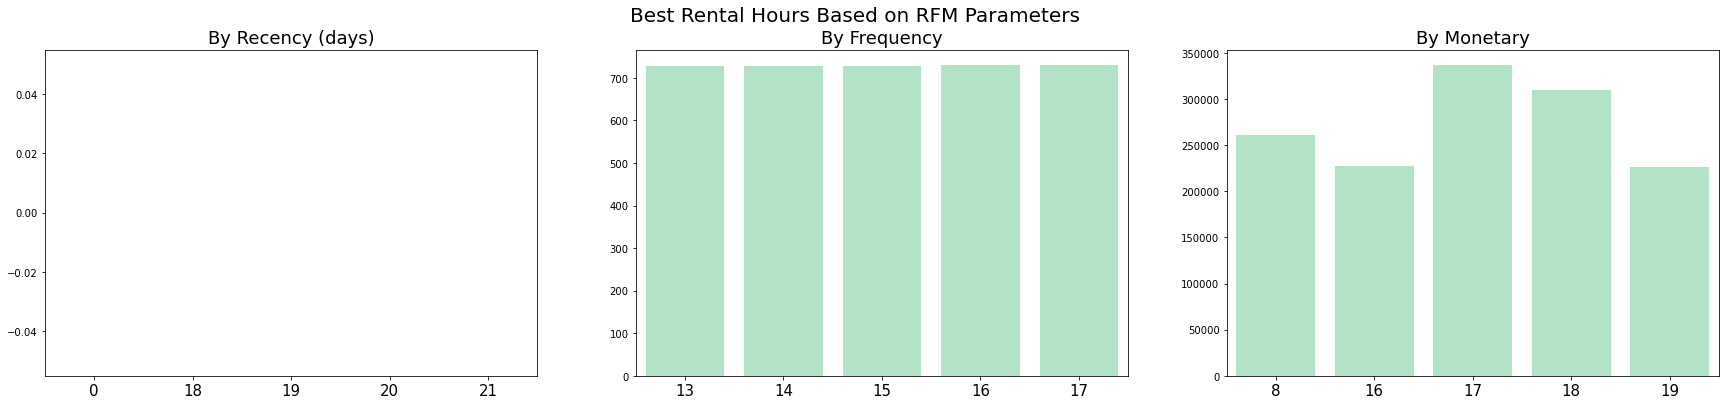

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors
colors = ["#ABEBC6", "#ABEBC6", "#ABEBC6", "#ABEBC6", "#ABEBC6"]

# Sort rfm_df by recency, frequency, and monetary and select top 5
rfm_df_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
rfm_df_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5)
rfm_df_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5)

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Plot by Recency
sns.barplot(y="recency", x="hr", data=rfm_df_recency, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Plot by Frequency
sns.barplot(y="frequency", x="hr", data=rfm_df_frequency, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Plot by Monetary
sns.barplot(y="monetary", x="hr", data=rfm_df_monetary, palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Set suptitle
plt.suptitle("Best Rental Hours Based on RFM Parameters", fontsize=20)

# Show the plot
plt.show()
